House Price Prediction

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np

In [3]:
filePath = "House_Price_Prediction_Dataset.csv"
housePrice = pd.read_csv(filePath)

Basic Data Exploration

In [4]:
housePrice.head(10)

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056
5,6,3944,1,2,1,1906,Urban,Poor,No,93262
6,7,3671,1,1,2,1948,Rural,Poor,Yes,448722
7,8,3419,2,4,1,1925,Suburban,Good,Yes,594893
8,9,630,2,2,1,1932,Rural,Poor,Yes,652878
9,10,2185,3,3,1,2000,Downtown,Poor,No,340375


In [5]:
housePrice.shape

(2000, 10)

In [6]:
housePrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [7]:
housePrice.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


Checking and handling missing or duplicated values

In [8]:
housePrice.isnull().sum()

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

In [9]:
housePrice.duplicated().sum()

np.int64(0)

Converting categorical columns to category data type

In [10]:
housePrice["Location"] = housePrice["Location"].astype("category")
housePrice["Condition"] = housePrice["Condition"].astype("category")
housePrice["Garage"] = housePrice["Garage"].astype("category")

print("Updated Data Types:")
print(housePrice.dtypes)

Updated Data Types:
Id              int64
Area            int64
Bedrooms        int64
Bathrooms       int64
Floors          int64
YearBuilt       int64
Location     category
Condition    category
Garage       category
Price           int64
dtype: object


Outiler Detection and Handling

In [11]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

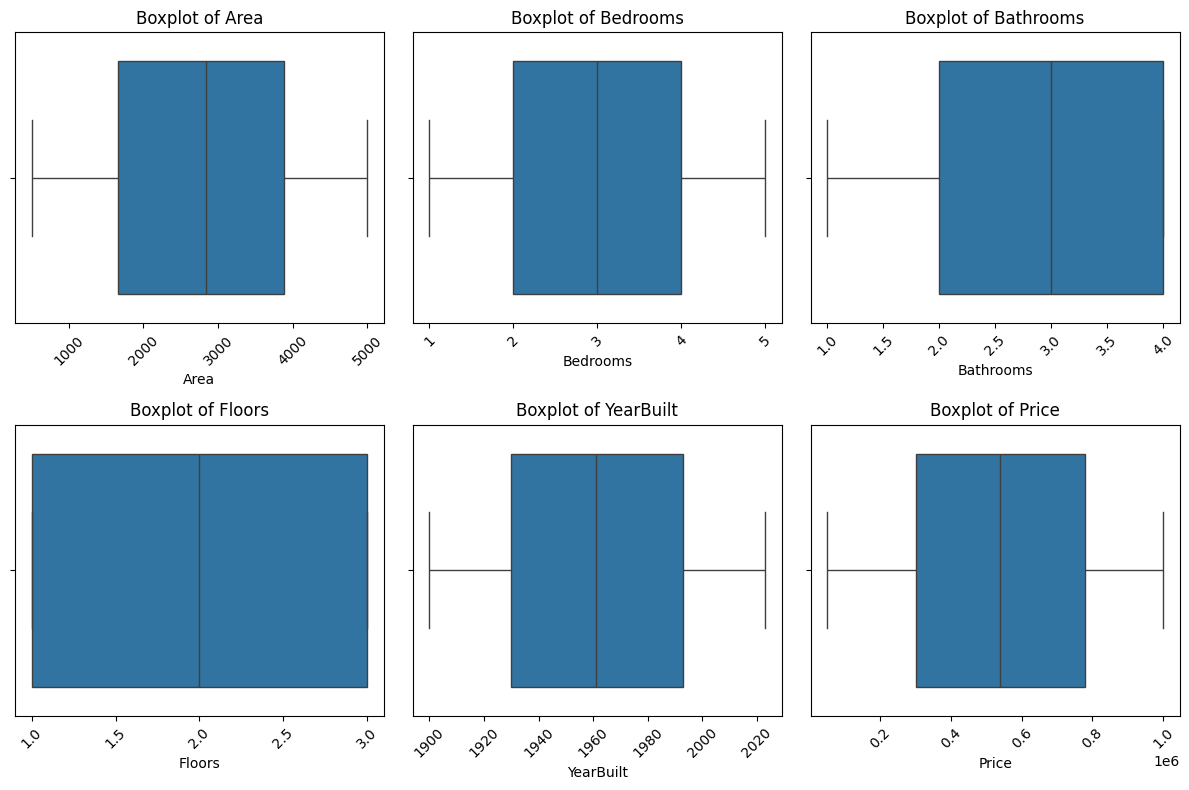

In [12]:
# Univariate Analysis
numerical_columns = ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Price']
categorical_colums = ['Location', 'Condition', 'Garage']
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=housePrice, x=column)
    plt.title(f'Boxplot of {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


From the boxplot there seems to be no visible outliers. The dataset looks to be balanced and have no extreme values

Data Visualization and Feature Analysis

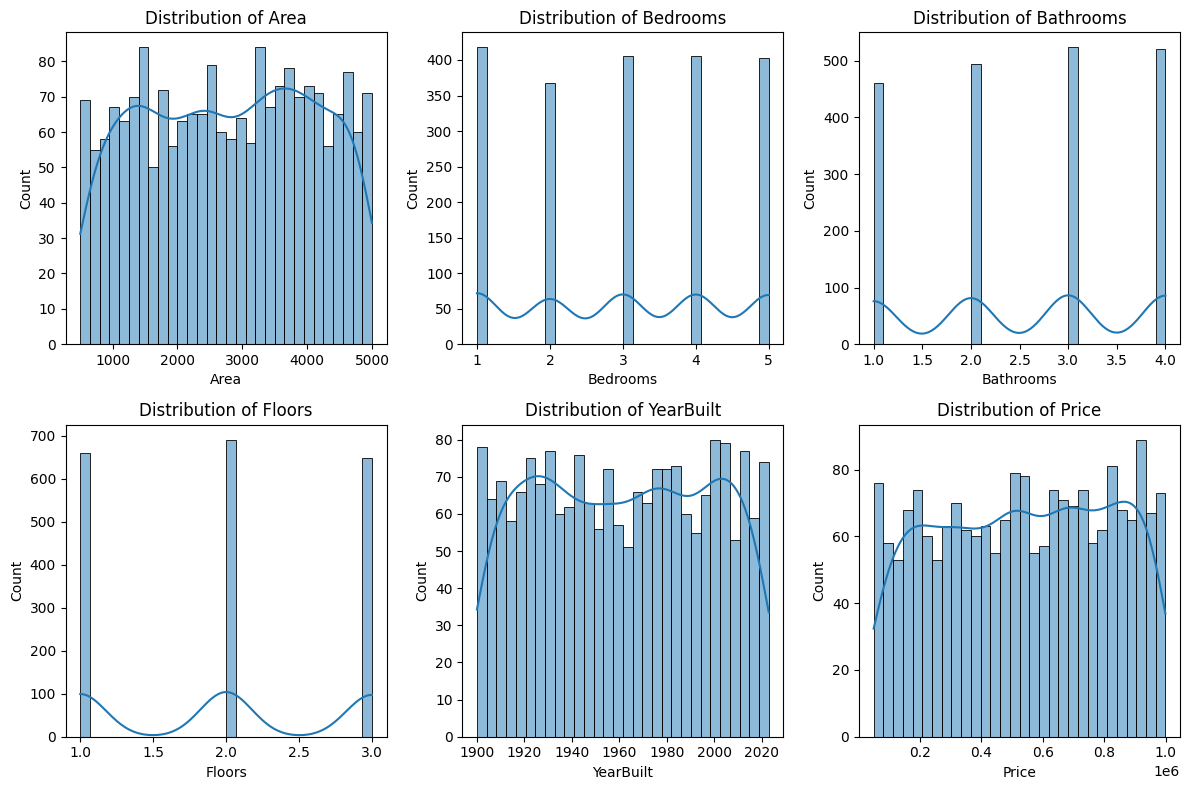

In [13]:
# Visualizing Distributions of Features

plt.figure(figsize=(12, 8))

for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(housePrice[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

The Features here also shows a balanced distribution. Price does not seem to follow a normal distribution due to which linear regression may not fit well. Best to apply some transformations like log of price and log of area, or using model that can handle non linear data.

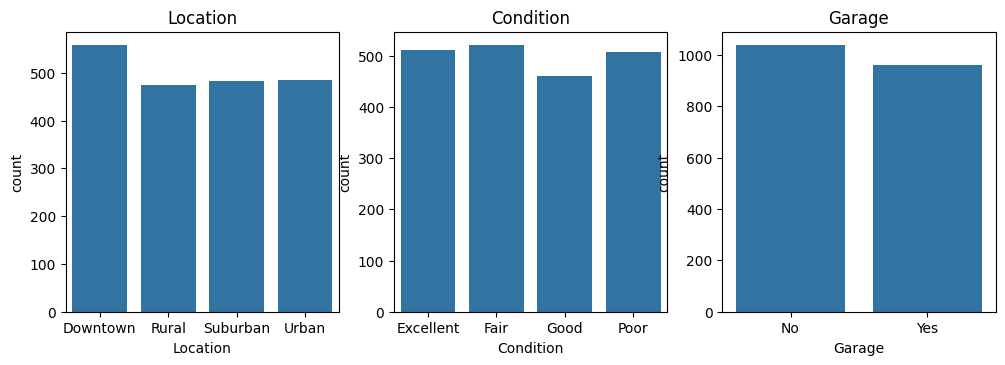

In [14]:
# Visualization on Catergorical Features

plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_colums):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=housePrice[col], data=housePrice)
    plt.title(f"{col}")

plt.show()

The Countplot shows that the categorical data are balanced

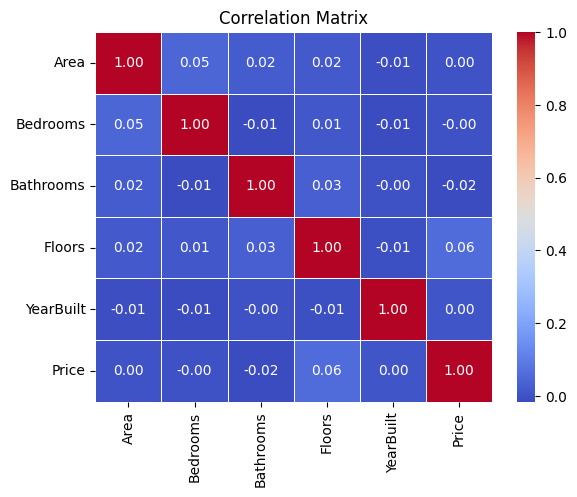

In [15]:
# Correlatoin Analysis

correlation_matrix = housePrice[numerical_columns].corr()

plt.Figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Heatmap shows that Price has little or negative correlation between Area, Bedrooms, Bathrooms which is odd as Price in real world housing data tends to have high correlation which these features

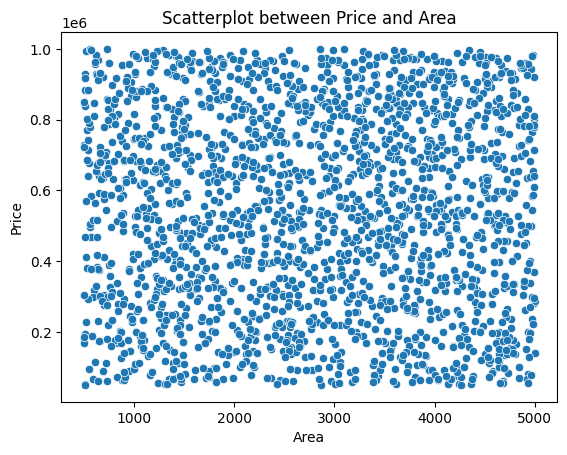

In [16]:
sns.scatterplot(data=housePrice, x="Area", y="Price")

plt.title("Scatterplot between Price and Area")
plt.xlabel("Area")
plt.ylabel("Price")

plt.show()

Scatterplot shows that the data point are spread ramdomly without any clear linear trend. There might be non linear relationship between Price and Area.

Finding out the reason why numerical features aren't correlating

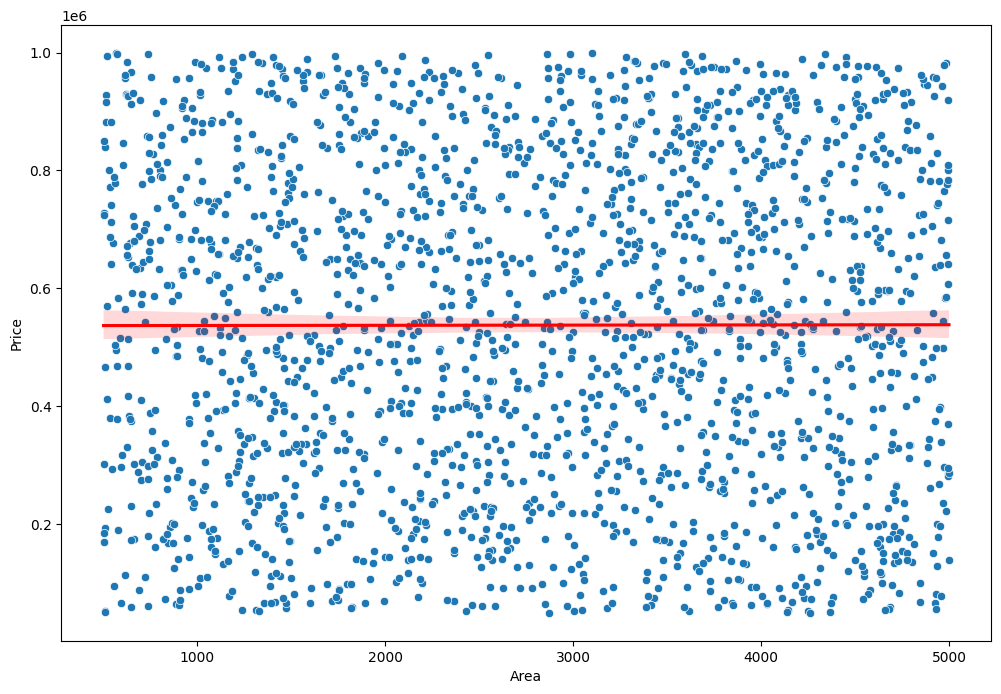

In [17]:
# Using regression plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x="Area", y="Price", data=housePrice)
sns.regplot(x="Area", y="Price", data=housePrice, scatter=False, color="red")
plt.show()

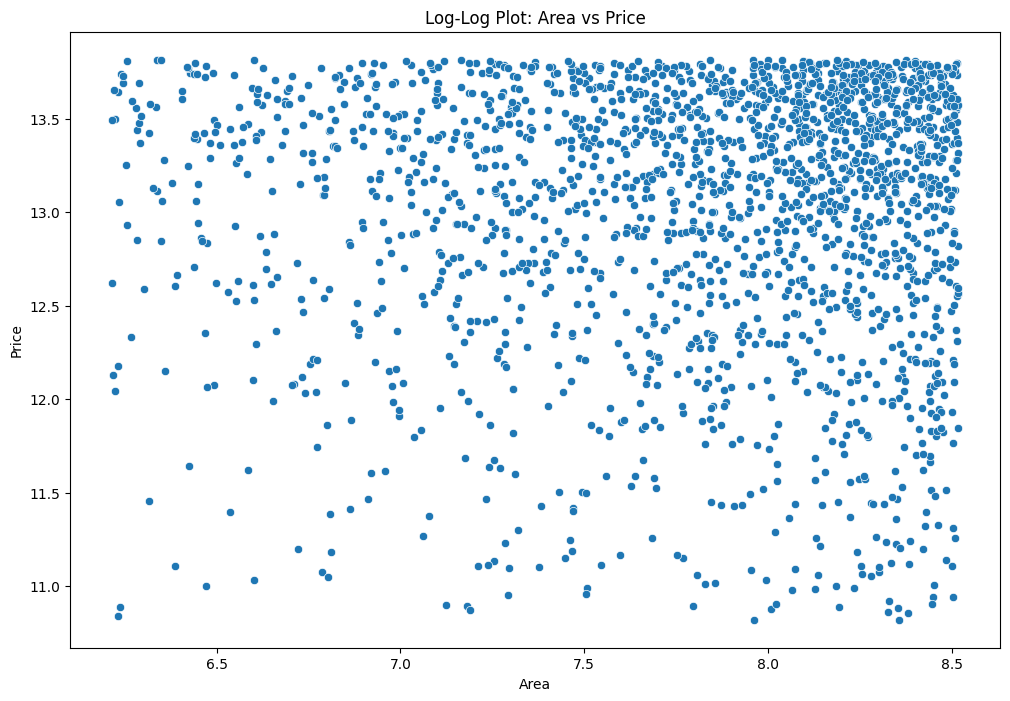

In [18]:
# Try log transformation
plt.figure(figsize=(12, 8))
sns.scatterplot(x=np.log(housePrice["Area"]), y=np.log(housePrice["Price"]))
plt.title("Log-Log Plot: Area vs Price")
plt.show()


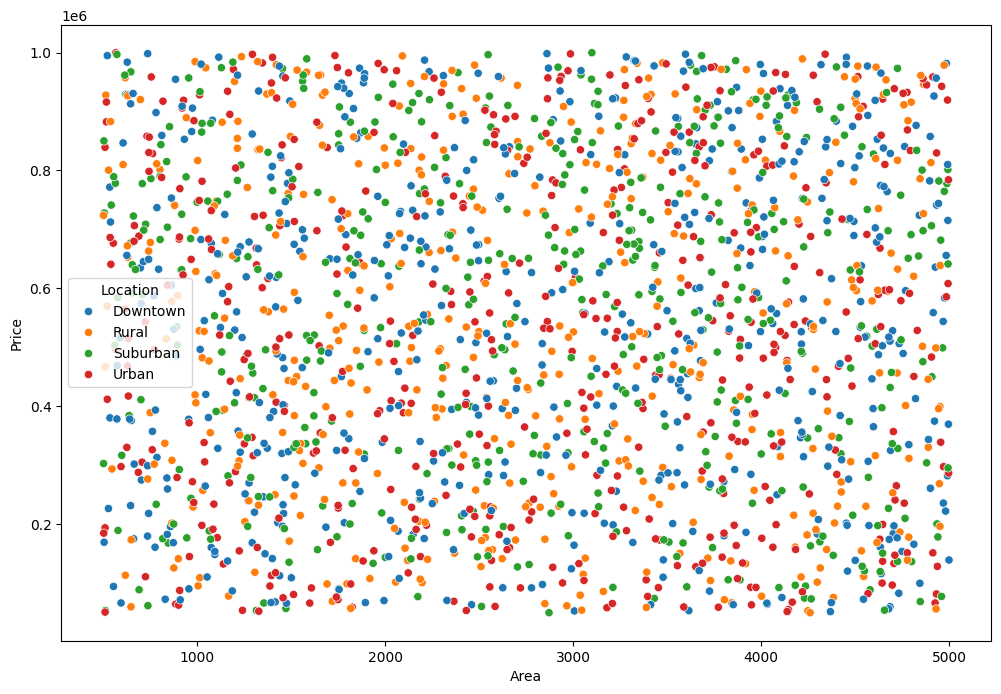

In [19]:
# Identifying whether categorical variables has effect on Price and Area
plt.figure(figsize=(12, 8))
sns.scatterplot(x="Area", y="Price", hue="Location", data=housePrice)
plt.show()

In [23]:
print(housePrice.groupby("Location")["Price"].mean())
print(housePrice.groupby("Condition")["Price"].mean())
print(housePrice.groupby("Garage")["Price"].mean())

Location
Downtown    536059.661290
Rural       538613.943038
Suburban    557416.333333
Urban       518963.548454
Name: Price, dtype: float64
Condition
Excellent    530812.009785
Fair         560594.140115
Good         529002.351410
Poor         528933.218935
Name: Price, dtype: float64
Garage
No     536920.700385
Yes    538492.747401
Name: Price, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23668\3005974659.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(housePrice.groupby("Location")["Price"].mean())
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23668\3005974659.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(housePrice.groupby("Condition")["Price"].mean())
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23668\3005974659.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default a

In [25]:
housePrice['LogArea'] = np.log(housePrice['Area'])
housePrice['LogPrice'] = np.log(housePrice['Price'])
housePrice[['LogArea','LogPrice']].corr()

,LogArea,LogPrice
LogArea,1.000000,-0.003681
LogPrice,-0.003681,1.000000


After log transformation the coorelation of Price and Area is still close to Zero. The dataset seem to be filled with random noises, Linear Regression might not be the best move (will still try but will switch to tree based models for better handling)

In [30]:
# Feature Engineering
housePrice["HouseAge"] = 2025 - housePrice["YearBuilt"]
housePrice.drop("YearBuilt", axis=1, inplace=True)

In [27]:
# Copying dataframe object for tree based model
df_original = housePrice.copy()   # save a version for tree-based models

In [28]:
housePrice = pd.get_dummies(housePrice, columns=["Location", "Condition", "Garage"], drop_first=True)

In [31]:
housePrice.columns

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'Price', 'LogArea',
       'LogPrice', 'HouseAge', 'Location_Rural', 'Location_Suburban',
       'Location_Urban', 'Condition_Fair', 'Condition_Good', 'Condition_Poor',
       'Garage_Yes'],
      dtype='object')

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

In [33]:
# Seperate feature and target

X = housePrice.drop(["Area", "Price", "LogPrice"], axis=1)
y = housePrice["LogPrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (1600, 13)
Test shape: (400, 13)


In [35]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [37]:
print("Intercept:", model_lr.intercept_)
print("Coefficients:", model_lr.coef_)

Intercept: 13.146643671872965
Coefficients: [-2.73679465e-05  5.65353420e-03 -2.27447845e-02  5.56055368e-02
 -2.28266072e-02 -3.32832128e-04 -8.10224930e-03  2.90756015e-02
 -5.67287555e-02  5.46616708e-02 -2.77289344e-02  1.20050817e-03
  1.64070537e-02]


In [38]:
y_pred = model_lr.predict(X_test)

In [39]:
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", root_mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))


MAE:  0.5988561925378505
MSE:  0.5600476962611828
RMSE:  0.7483633450812398
R2 Score:  -0.003088140406058981
